In [11]:
#Single Bit Error Correction Code 

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

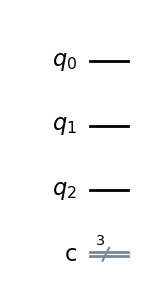

In [13]:
# Create a 3-qubit circuit + 3 classical bits for measurement
qc = QuantumCircuit(3, 3)
qc.draw(output="mpl")

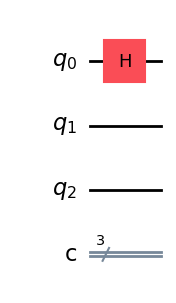

In [14]:
# Step 1: Encode logical qubit (start with |+> = H|0>)
#Encoding Step create qubit 1 in Superposition state using Hadamard gate
qc.h(0) 
qc.draw(output="mpl")


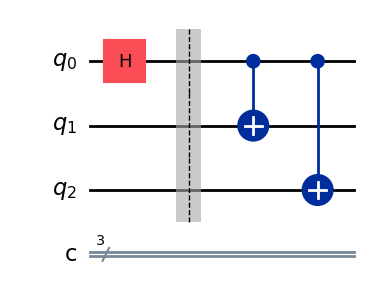

In [15]:
#Copy to qubit 1 and qubit 2 using CNOT gate
qc.barrier()
qc.cx(0, 1)
qc.cx(0, 2) 
qc.draw(output="mpl")

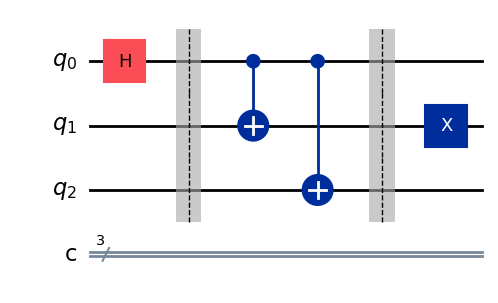

In [16]:
# Optional: Introduce a bit-flip error (on qubit 1)
qc.barrier()
qc.x(1)
qc.draw(output="mpl")

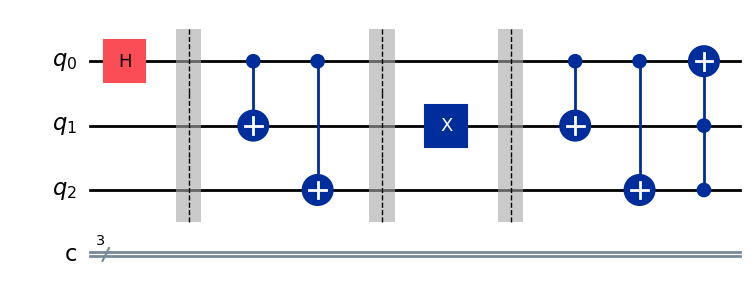

In [17]:
# Step 2: Decode (Majority voting — reverse the encoding) cx= CNOT Gate if (control=0)=> target (no change) if (control1)=>target(flip)
qc.barrier()
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(1, 2, 0)      # Correct qubit 0 based on majority if 000/001/010/100=>000 and 111/110/011/101=>111
qc.draw(output="mpl")

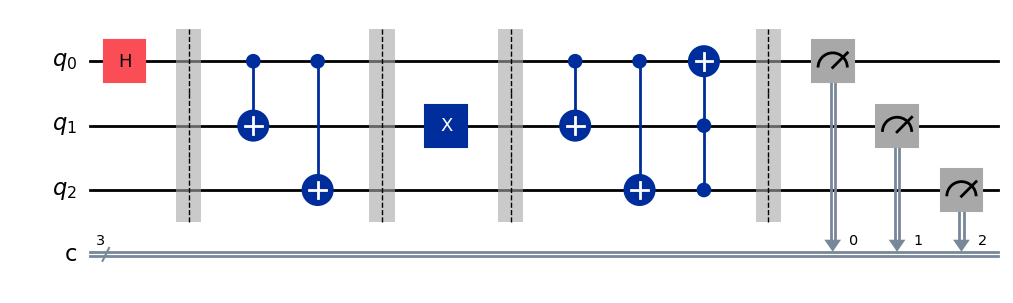

In [18]:
# Step 3: Measure all qubits
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
qc.draw(output="mpl")

Measurement counts: {'011': 517, '010': 483}
Measurement outcomes:
{'011': 517, '010': 483}


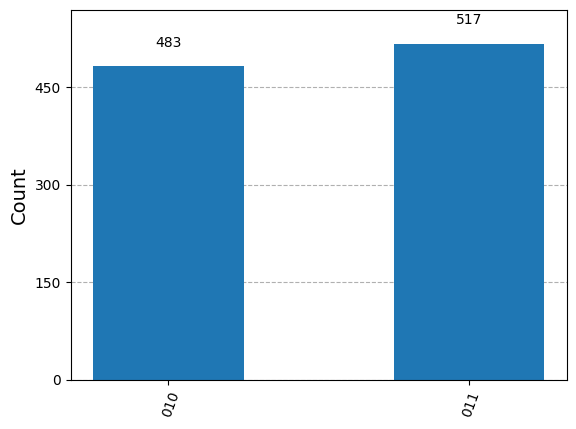

In [19]:
#Introduce Simulator
simulator=AerSimulator()


# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the circuit on the simulator
job = simulator.run(compiled_circuit, shots=1000)

# Get the results
result = job.result()
counts = result.get_counts(qc)
print(f"Measurement counts: {counts}")

# Show results
print("Measurement outcomes:")
print(counts)
plot_histogram(counts)

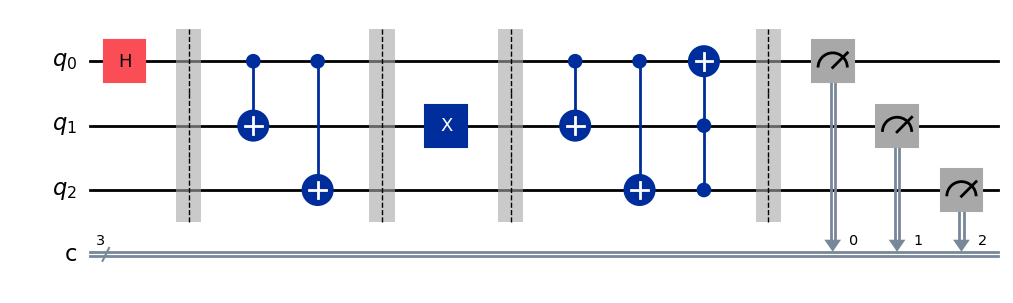

In [20]:
qc.draw(output="mpl")